In [2]:
def import_csv(file):
    # Read the file into a DataFrame: df
    import pandas as pd
    return pd.read_csv(file)

In [3]:
import pandas as pd

def read_csv_to_dataframe(file_path):
    """
    Reads a comma-separated CSV file and converts it into a pandas DataFrame.
    
    Parameters:
        file_path (str): Path to the CSV file.
    
    Returns:
        pd.DataFrame: DataFrame containing the CSV data.
    """
    df = pd.read_csv(file_path)  # assumes the file is comma-separated
    return df

In [4]:
# Ensure the function is defined (run the cell with the function definition if needed)
terminos_df = read_csv_to_dataframe(r"C:\git_RobertVZ\CursoPython\bases_datos\Terminos_lagoon_TA_DIC_2023_RawData.csv")
print(terminos_df.head())  # show first 5 rows

   sample      date     estuary   area station layer_depth season  \
0  CDL01S  5/3/2020  Candelaria  River   CDL01     Surface    Dry   
1  CDL01F  5/3/2020  Candelaria  River   CDL01      Bottom    Dry   
2  CDL02S  5/3/2020  Candelaria  River   CDL02     Surface    Dry   
3  CDL02F  5/3/2020  Candelaria  River   CDL02      Bottom    Dry   
4  CDL03S  5/3/2020  Candelaria  River   CDL03     Surface    Dry   

   chlorophy_microg_l  cond_microsiemens_cm  depth_m  ...  do_mg_l  sal_psu  \
0                0.36                7015.4    0.464  ...     7.12     3.56   
1                4.19               29886.1    7.792  ...     4.90    16.97   
2                0.92               16691.1    0.453  ...     6.99     8.94   
3                2.23               24847.4    1.261  ...     6.52    13.87   
4                0.58               46341.6    0.465  ...     6.24    28.06   

   sp_cond_microsiemens_cm  turbidity_fnu  temp_c  latitude  longitude  \
0                   6547.7          

In [5]:
from scipy.stats import mannwhitneyu

def mann_whitney_test(data1, data2, alpha=0.05):
    """
    Performs the Mann-Whitney U test and prints U statistic, p-value, and result.
    """
    result = mannwhitneyu(data1, data2, alternative='two-sided')
    
    print(f"U statistic = {result.statistic}")
    print(f"p-value = {result.pvalue}")

    if result.pvalue < alpha:
        print("The difference is statistically significant.")
    else:
        print("The difference is not statistically significant.")

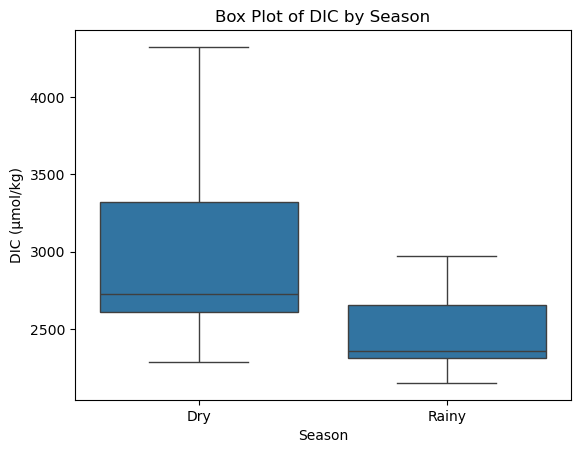

In [6]:
# Plot the box plot of TA by season
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
sns.boxplot(x='season', y='dic_micromol_kg', data=terminos_df)
#sns.swarmplot(x='season', y='sal_psu', data=co2_data, color=".25")

# Add labels and title
plt.xlabel('Season')
plt.ylabel('DIC (μmol/kg)')
plt.title('Box Plot of DIC by Season')

# Show the plot
plt.show()

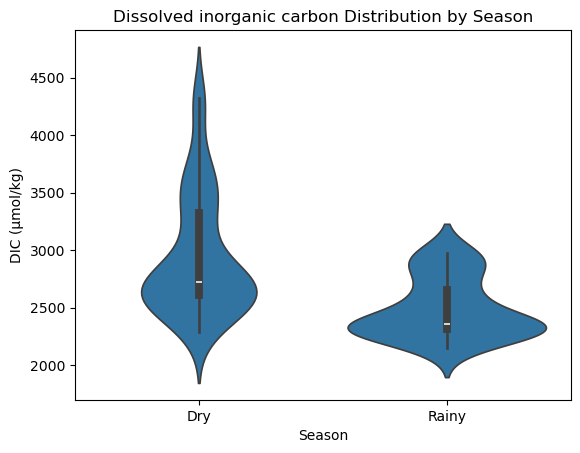

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a box plot
sns.violinplot(x='season', y='dic_micromol_kg', data=terminos_df)

plt.title('Dissolved inorganic carbon Distribution by Season')
plt.xlabel('Season')
plt.ylabel('DIC (μmol/kg)')
plt.show()

In [10]:
# Filter the TA data by season
TEM_dry = terminos_df.loc[terminos_df["season"] == "Dry", "temp_c"]
TEM_rainy = terminos_df.loc[terminos_df["season"] == "Rainy", "temp_c"]

# Perform the Mann-Whitney U test for TA between dry and rainy seasons
mann_whitney_test(TEM_dry, TEM_rainy)

U statistic = 551.0
p-value = 5.317160670684041e-06
The difference is statistically significant.


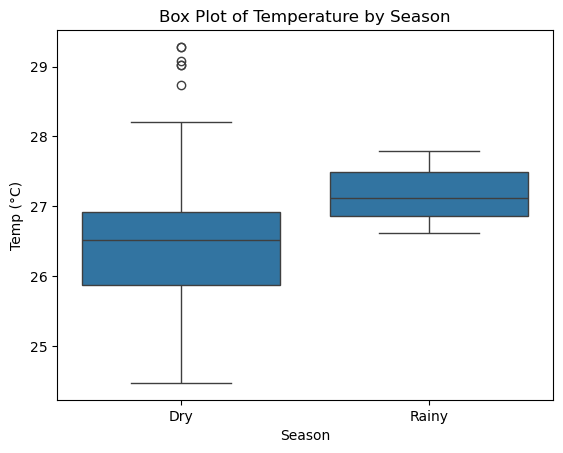

In [11]:
# Plot the box plot of TA by season
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
sns.boxplot(x='season', y='temp_c', data=terminos_df)
#sns.swarmplot(x='season', y='sal_psu', data=co2_data, color=".25")

# Add labels and title
plt.xlabel('Season')
plt.ylabel('Temp (°C)')
plt.title('Box Plot of Temperature by Season')

# Show the plot
plt.show()

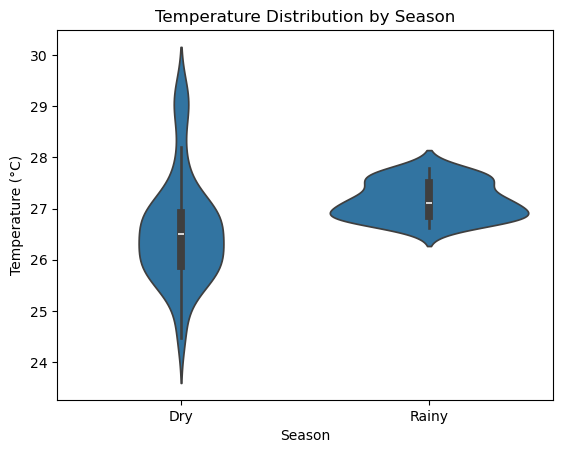

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a box plot
sns.violinplot(x='season', y='temp_c', data=terminos_df)

plt.title('Temperature Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Temperature (°C)')
plt.show()